# Importazione e modifica dati

In [ ]:
from google.colab import drive 
import pandas as pd
import re
import numpy as np


import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [14, 8] # dimensione grafici matplotlib

# Colore degli elementi nei grafici
colore_scelto = (0,0.6,0.9,1) # azzurro
#colore_scelto = (0.98, 0.19, 0.13, 1) # rosso
#colore_scelto = (0.90, 0.56, 0.16, 1) # beige

# Dimensione dei font
font_label = 15
font_title = 20

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/DS Lab - PROGETTO/Ottobre/dataset_normalizzato.csv')

In [ ]:
df.head()

,ad_form_id,clicks,impressions,os_android,os_bsd,os_ios,os_linux,os_osx,os_other,os_windows,...,categories2_welfare,categories2_windsurfing,categories2_womenshealth,categories2_work,categories2_wrestling,categories2_zoo,feelings1_amusement,feelings1_emotions,feelings1_pain,feelings1_others
0,8408205703932483258,0,1,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0
1,6157419832685345406,0,3,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0
2,6336227050936118437,0,3,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,56.25,43.75,0.0,0.0
3,6272249560265519045,0,5,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0
4,2248420359615433360,0,5,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0


Aggiungiamo colonna click_status:

In [ ]:
def clickstatus(riga):
  if riga['clicks']>0:
    return 'yes'
  else:
    return 'no'

df['click_status'] = df.apply(clickstatus, axis=1)
df.drop(columns='clicks', inplace=True)

In [ ]:
# totale dei click
len(df[df['click_status']=='yes'])

189

In [ ]:
# totale dei non click
len(df[df['click_status']=='no'])

62190

Eliminazione colonna Id e Impression:

In [ ]:
df.drop(columns='ad_form_id', inplace=True)

In [ ]:
df.drop(columns='impressions', inplace=True)

Tipi delle variabili:

In [ ]:
df.dtypes

os_android               int64
os_bsd                   int64
os_ios                   int64
os_linux                 int64
os_osx                   int64
                        ...   
feelings1_amusement    float64
feelings1_emotions     float64
feelings1_pain         float64
feelings1_others       float64
click_status            object
Length: 425, dtype: object

In [ ]:
df = df.astype({
    'os_android':'bool',
    'os_bsd':'bool',
    'os_ios':'bool',
    'os_linux':'bool',
    'os_osx':'bool',
    'os_other':'bool',
    'os_windows':'bool',
    'device_type':'object',
    'browser_android':'bool',
    'browser_chrome':'bool',
    'browser_chromium':'bool',
    'browser_edge':'bool',
    'browser_firefox':'bool',
    'browser_ie':'bool',
    'browser_opera':'bool',
    'browser_other':'bool',
    'browser_safari':'bool',
    'browser_unknown':'bool'
}) 

# Tolgo categories 1

In [ ]:
colonne = df.columns

# Colonne categories1
cat1 = re.compile('categories1_+.*', re.IGNORECASE)
cats1 = []
for label in colonne:
  occ = cat1.findall(label)
  if occ:
    cats1.append(occ[0])

df.drop(columns=cats1, inplace=True)

# Visualizzo medie in generale

In [ ]:
# Numero di colonne
colonne = df.columns
len(colonne)

399

In [ ]:
# Tipi delle colonne
df.dtypes.unique()

array([dtype('bool'), dtype('O'), dtype('float64')], dtype=object)

In [ ]:
# Creo un dataframe con le medie di ogni colonna
df_medie = pd.DataFrame()
for colonna in colonne:
  if df[colonna].dtypes == "float64":
    diz = {}
    diz['Colonna'] = colonna
    diz['Media'] = df[colonna].mean()

    df_medie = df_medie.append(diz, ignore_index=True)

In [ ]:
df_medie

,Colonna,Media
0,time1_workday_morning,13.751942
1,time1_workday_afternoon,21.828022
2,time1_workday_evening,15.220896
3,time1_workday_night,8.540527
4,time1_weekend_morning,10.508831
...,...,...
375,categories2_zoo,0.006099
376,feelings1_amusement,12.626908
377,feelings1_emotions,11.653247
378,feelings1_pain,0.058672


Analizzo un po' queste medie.

In [ ]:
# Massimo assoluto
df_medie.loc[df_medie['Media'].idxmax()]

Colonna       L00_50
Media      43.751383
Name: 8, dtype: object

In [ ]:
# Minimo (tolgo le colonne con media diversa da 0 per fare in modo che stampi più cifre possibili e non 0.0)
df_medie.loc[df_medie[df_medie['Media'] != 0]['Media'].idxmin()]

Colonna    categories2_unions
Media                0.000001
Name: 356, dtype: object

# Time1

In [ ]:
# Colonne time1
t1 = re.compile('time1_+.*', re.IGNORECASE)
time1 = []
for label in df.columns:
  occ = t1.findall(label)
  if occ:
    time1.append(occ[0])

## Click e non click uniti

In [ ]:
# Medie dei time1
medie_t1 = pd.DataFrame()
for colonna in time1:
  if df[colonna].dtypes == "float64":
    diz = {}

    # Sistemo nome
    str_colonna = colonna
    str_colonna = str_colonna.replace('time1_', '')
    str_colonna = str_colonna.replace(str_colonna[0], str_colonna[0].upper())
    str_colonna = str_colonna.replace(str_colonna[0], str_colonna[0].upper())

    # Costruisco il dizionario
    diz['Colonna'] = str_colonna
    diz['Media'] = df[colonna].mean()
    diz['Media click'] = df[df['click_status'] == 'yes'][colonna].mean()
    diz['Media non click'] = df[df['click_status'] == 'no'][colonna].mean()

    # Aggiungo al dataframe
    medie_t1 = medie_t1.append(diz, ignore_index=True)

In [ ]:
medie_t1

,Colonna,Media,Media click,Media non click
0,Workday_morning,13.751942,9.767407,13.764052
1,Workday_afternoon,21.828022,21.655397,21.828547
2,Workday_evening,15.220896,20.413016,15.205117
3,Workday_night,8.540527,10.564021,8.534378
4,Weekend_morning,10.508831,10.106190,10.510055
5,Weekend_afternoon,15.655607,17.682116,15.649448
6,Weekend_evening,8.060064,4.856720,8.069799
7,Weekend_night,6.433962,4.955026,6.438456


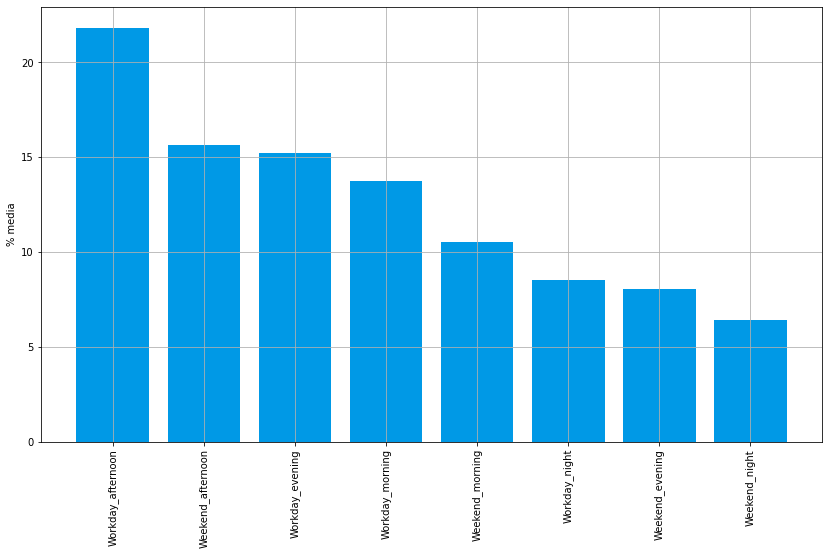

In [ ]:
plt.bar(medie_t1.sort_values('Media', ascending=False)['Colonna'], medie_t1.sort_values('Media', ascending=False)['Media'], color=colore_scelto); # ordinati
#plt.bar(medie_t1['Colonna'], medie_t1['Media']); # non ordinati
plt.xticks(rotation='vertical');
plt.grid();
plt.ylabel('% media');

## Separazione weekend e workday

Provo a separare weekend da worday per vedere differenze.

In [ ]:
# Funzione per non far visualizzare workday o weekend
def correttore(riga):
  if 'Weekend' in riga['Colonna']:
    x = riga['Colonna']
    x = x.replace('Weekend_', '')
    x = x.replace(x[0], x[0].upper())

    return x
  
  elif 'Workday' in riga['Colonna']:
    x = riga['Colonna']
    x = x.replace('Workday_', '')
    x = x.replace(x[0], x[0].upper())

    return x
  
  else:
    return riga['Colonna'] # per evitare eventuale errori

In [ ]:
# Medie dei time1_weekend
medie_t1_we = pd.DataFrame()
for colonna in time1:
  if 'time1_weekend' in colonna:

    # Sistemo nome per visualizzazione
    str_colonna = colonna
    str_colonna = str_colonna.replace('time1_', '')
    str_colonna = str_colonna.replace(str_colonna[0], str_colonna[0].upper())
      
    # Metto l'iniziale maiuscola maiuscola
    str_colonna = str_colonna.replace(str_colonna[0], str_colonna[0].upper())

    medie_t1_we = medie_t1_we.append(medie_t1[medie_t1['Colonna'] == str_colonna])

# Sistemo nomi colonne
medie_t1_we['Colonna'] = medie_t1_we.apply(correttore, axis=1)

# Correggo evening
medie_t1_we.loc[6, 'Colonna'] = 'Evening'

medie_t1_we

,Colonna,Media,Media click,Media non click
4,Morning,10.508831,10.106190,10.510055
5,Afternoon,15.655607,17.682116,15.649448
6,Evening,8.060064,4.856720,8.069799
7,Night,6.433962,4.955026,6.438456


In [ ]:
# Medie dei time1_workday
medie_t1_wd = pd.DataFrame()
for colonna in time1:
  if 'time1_workday' in colonna:

    # Sistemo nome per visualizzazione
    str_colonna = colonna
    str_colonna = str_colonna.replace('time1_', '')
    str_colonna = str_colonna.replace(str_colonna[0], str_colonna[0].upper())
      
    # Metto l'iniziale maiuscola maiuscola
    str_colonna = str_colonna.replace(str_colonna[0], str_colonna[0].upper())

    medie_t1_wd = medie_t1_wd.append(medie_t1[medie_t1['Colonna'] == str_colonna])

# Sistemo nomi colonne
medie_t1_wd['Colonna'] = medie_t1_wd.apply(correttore, axis=1)

# Correggo evening
medie_t1_wd.loc[2, 'Colonna'] = 'Evening'

medie_t1_wd

,Colonna,Media,Media click,Media non click
0,Morning,13.751942,9.767407,13.764052
1,Afternoon,21.828022,21.655397,21.828547
2,Evening,15.220896,20.413016,15.205117
3,Night,8.540527,10.564021,8.534378


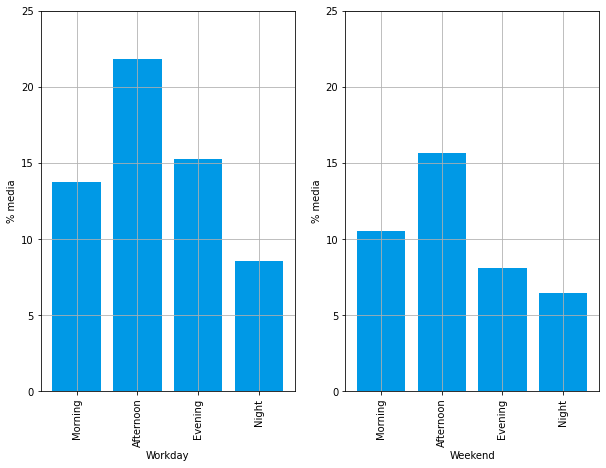

In [ ]:
# Workday
plt.subplot(121);
plt.bar(medie_t1_wd['Colonna'], medie_t1_wd['Media'], color=colore_scelto);
plt.xticks(rotation='vertical');
plt.grid();
plt.ylabel('% media');
plt.xlabel('Workday');
plt.ylim(0,25);

# Weekend
plt.subplot(122);
plt.bar(medie_t1_we['Colonna'], medie_t1_we['Media'], color=colore_scelto);
plt.xticks(rotation='vertical');
plt.grid();
plt.ylabel('% media');
plt.xlabel('Weekend');
plt.ylim(0,25);

Nei workday sembra esserci maggiore attività in generale. Vedo cosa succede se separo nei workday click e non click (i non click non so se possano servirci, ma magari ci può interessare vedere quando i click cliccano maggiormente; nel dubbio stampo tutto).

## Click e non click separati

### Workday

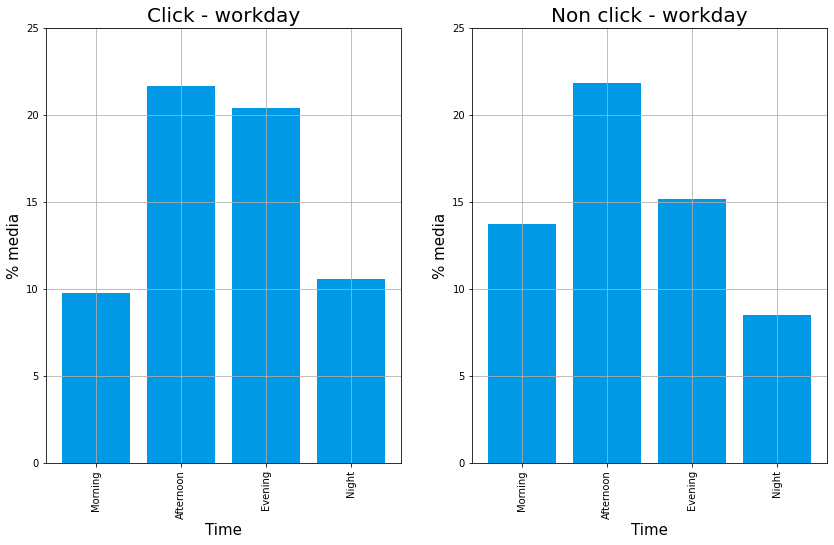

In [ ]:
# Click
plt.subplot(121);
plt.bar(medie_t1_wd['Colonna'], medie_t1_wd['Media click'], color=colore_scelto);
plt.xticks(rotation='vertical');
plt.grid();
plt.ylabel('% media', fontsize=font_label);
plt.xlabel('Time', fontsize=font_label);
plt.title('Click - workday', fontsize=font_title);
plt.ylim(0,25);

# Non click
plt.subplot(122);
plt.bar(medie_t1_wd['Colonna'], medie_t1_wd['Media non click'], color=colore_scelto);
plt.xticks(rotation='vertical');
plt.grid();
plt.ylabel('% media', fontsize=font_label);
plt.xlabel('Time', fontsize=font_label);
plt.title('Non click - workday', fontsize=font_title)
plt.ylim(0,25);

### Weekend

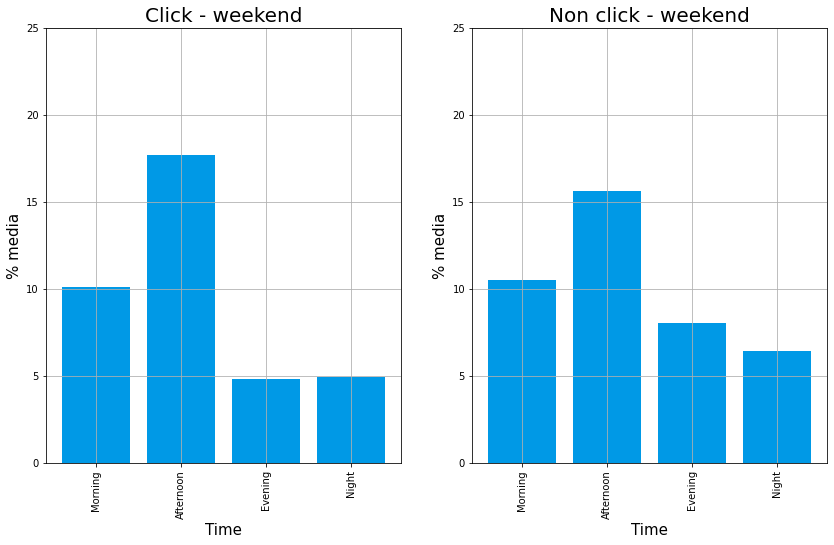

In [ ]:
# Click
plt.subplot(121);
plt.bar(medie_t1_we['Colonna'], medie_t1_we['Media click'], color=colore_scelto);
plt.xticks(rotation='vertical');
plt.grid();
plt.ylabel('% media', fontsize=font_label);
plt.xlabel('Time', fontsize=font_label);
plt.title('Click - weekend', fontsize=font_title);
plt.ylim(0,25);

# Non click
plt.subplot(122);
plt.bar(medie_t1_we['Colonna'], medie_t1_we['Media non click'], color=colore_scelto);
plt.xticks(rotation='vertical');
plt.grid();
plt.ylabel('% media', fontsize=font_label);
plt.xlabel('Time', fontsize=font_label);
plt.title('Non click - weekend', fontsize=font_title);
plt.ylim(0,25);

### Grafico unito

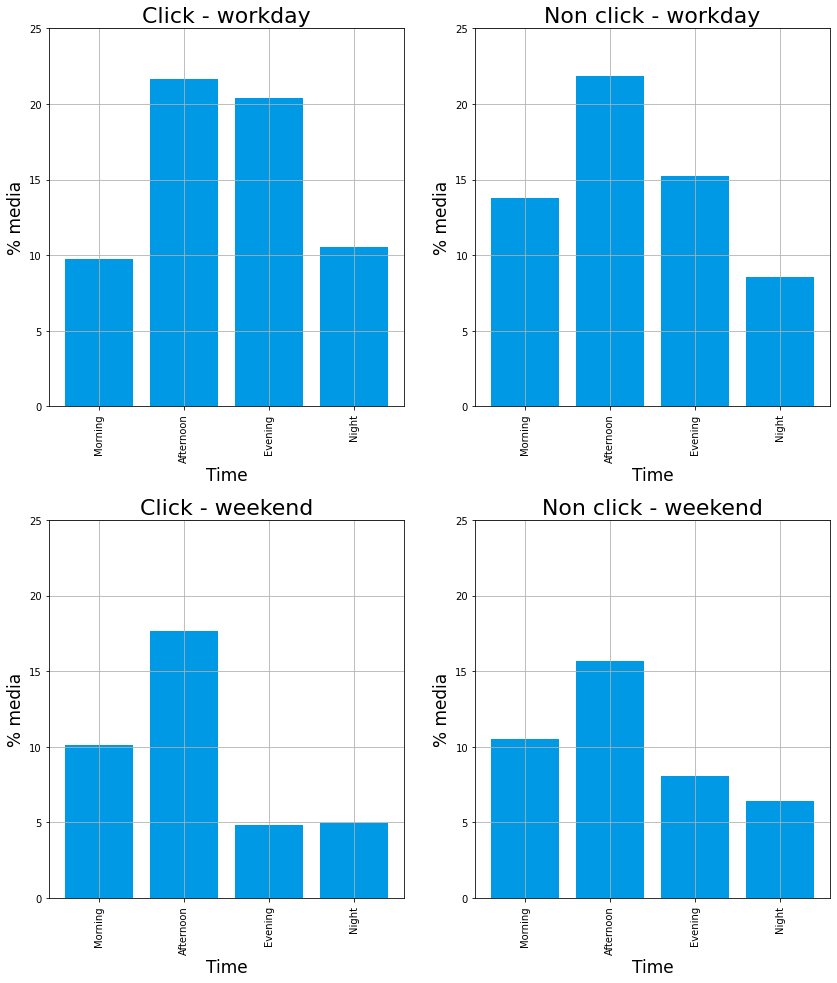

In [ ]:
# Modifico temporaneamente la dimensione delle figure
plt.rcParams['figure.figsize'] = [14, 16]

# Workday
# Click
plt.subplot(221);
plt.bar(medie_t1_wd['Colonna'], medie_t1_wd['Media click'], color=colore_scelto);
plt.xticks(rotation='vertical');
plt.grid();
plt.ylabel('% media', fontsize=font_label+2);
plt.xlabel('Time', fontsize=font_label+2);
plt.title('Click - workday', fontsize=font_title+2);
plt.ylim(0,25);

# Non click
plt.subplot(222);
plt.bar(medie_t1_wd['Colonna'], medie_t1_wd['Media non click'], color=colore_scelto);
plt.xticks(rotation='vertical');
plt.grid();
plt.ylabel('% media', fontsize=font_label+2);
plt.xlabel('Time', fontsize=font_label+2);
plt.title('Non click - workday', fontsize=font_title+2)
plt.ylim(0,25);

# Weekend
# Click
plt.subplot(223);
plt.subplots_adjust(hspace=0.3);
plt.bar(medie_t1_we['Colonna'], medie_t1_we['Media click'], color=colore_scelto);
plt.xticks(rotation='vertical');
plt.grid();
plt.ylabel('% media', fontsize=font_label+2);
plt.xlabel('Time', fontsize=font_label+2);
plt.title('Click - weekend', fontsize=font_title+2);
plt.ylim(0,25);

# Non click
plt.subplot(224);
plt.subplots_adjust(hspace=0.3);
plt.bar(medie_t1_we['Colonna'], medie_t1_we['Media non click'], color=colore_scelto);
plt.xticks(rotation='vertical');
plt.grid();
plt.ylabel('% media', fontsize=font_label+2);
plt.xlabel('Time', fontsize=font_label+2);
plt.title('Non click - weekend', fontsize=font_title+2);
plt.ylim(0,25);

# Riporto la dimensione delle figure a quella originale
plt.rcParams['figure.figsize'] = [14, 8]

# Lunghezze

In [ ]:
# Colonne lunghezza
l = re.compile('L\d+.*', re.IGNORECASE)
lung = []
for label in df.columns:
  occ = l.findall(label)
  if occ:
    lung.append(occ[0])

## Click e non click uniti

In [ ]:
# Medie lunghezze
medie_l = pd.DataFrame()
for colonna in lung:
  if df[colonna].dtypes == "float64":
    diz = {}

    # Sistemo nomi
    str_colonna = colonna
    str_colonna = str_colonna.replace('L', '[')
    str_colonna = str_colonna.replace('_', ',')
    str_colonna += ']'

    # Costruisco il dizionario
    diz['Colonna'] = str_colonna
    diz['Media'] = df[colonna].mean()
    diz['Media click'] = df[df['click_status'] == 'yes'][colonna].mean()
    diz['Media non click'] = df[df['click_status'] == 'no'][colonna].mean()

    # Aggiungo al dataframe
    medie_l = medie_l.append(diz, ignore_index=True)

# Correggo il primo e l'ultimo
medie_l.loc[0, 'Colonna'] = '[0,50]'
medie_l.loc[8, 'Colonna'] = '10001 or more'

In [ ]:
medie_l

,Colonna,Media,Media click,Media non click
0,"[0,50]",43.751383,37.049418,43.771750
1,"[51,100]",31.472000,45.759153,31.428580
2,"[101,250]",13.462190,5.817196,13.485423
3,"[251,500]",6.979423,8.449418,6.974955
4,"[501,1000]",1.747558,1.293333,1.748939
5,"[1001,2500]",2.433593,1.631376,2.436031
6,"[2501,5000]",0.102315,0.000000,0.102626
7,"[5001,10000]",0.049578,0.000000,0.049728
8,10001 or more,0.001956,0.000000,0.001962


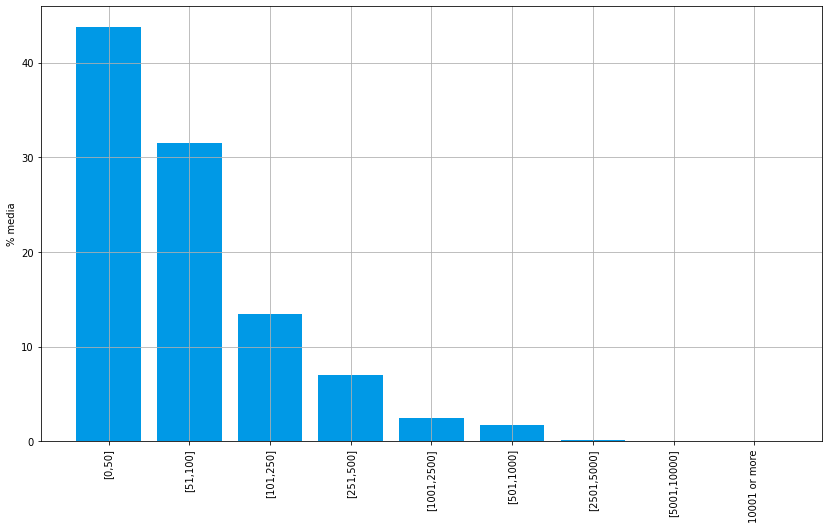

In [ ]:
plt.bar(medie_l.sort_values('Media', ascending=False)['Colonna'], medie_l.sort_values('Media', ascending=False)['Media'], color=colore_scelto); # ordinati
#plt.bar(medie_l['Colonna'], medie_l['Media']);  non ordinati
plt.xticks(rotation='vertical');
plt.grid();
plt.ylabel('% media');

## Click e non click separati
Ordinati rispetto all'ordine crescente delle pagine

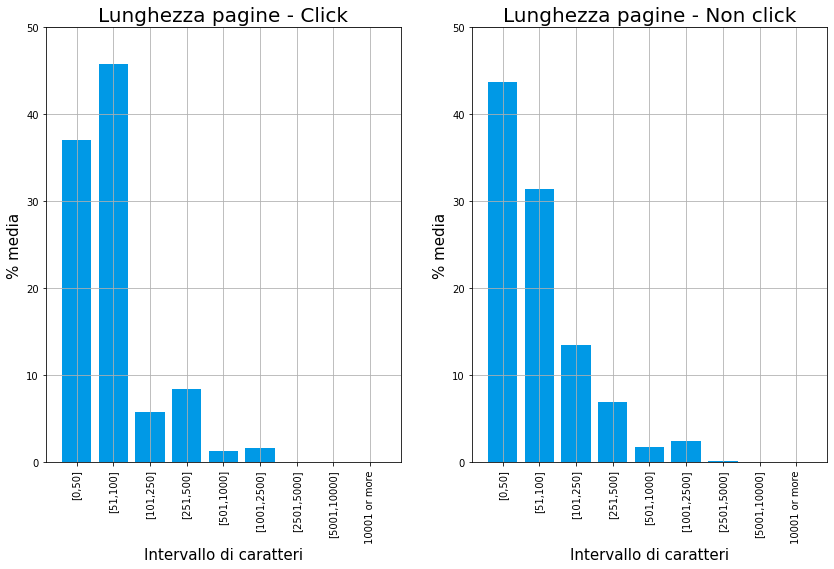

In [ ]:
# Click
plt.subplot(121);
#plt.bar(medie_l.sort_values('Media non click', ascending=False)['Colonna'], medie_l.sort_values('Media non click', ascending=False)['Media click']);
plt.bar(medie_l['Colonna'], medie_l['Media click'], color=colore_scelto);
plt.xticks(rotation='vertical');
plt.grid();
plt.ylabel('% media', fontsize=font_label);
plt.xlabel('Intervallo di caratteri', fontsize=font_label);
plt.title('Lunghezza pagine - Click', fontsize=font_title);
plt.ylim(0,50);

# Non click
plt.subplot(122);
#plt.bar(medie_l.sort_values('Media non click', ascending=False)['Colonna'], medie_l.sort_values('Media non click', ascending=False)['Media non click']);
plt.bar(medie_l['Colonna'], medie_l['Media non click'], color=colore_scelto);
plt.xticks(rotation='vertical');
plt.grid();
plt.ylabel('% media', fontsize=font_label);
plt.xlabel('Intervallo di caratteri', fontsize=font_label);
plt.title('Lunghezza pagine - Non click', fontsize=font_title);
plt.ylim(0,50);

# Categories2

In [ ]:
# Colonne categories
cat = re.compile('categories\d+.*', re.IGNORECASE)
cats2 = []
for label in df.columns:
  occ = cat.findall(label)
  if occ:
    cats2.append(occ[0])

## Click e non click uniti

In [ ]:
# Medie categories2
medie_c2 = pd.DataFrame()
for colonna in cats2:
  if df[colonna].dtypes == "float64":
    diz = {}

    # Sistemo nome (lascio perdere la maiuscola stavolta)
    str_colonna = colonna
    str_colonna = str_colonna.replace('categories2_', '')
    
    # Costruisco il dizionario
    diz['Colonna'] = str_colonna
    diz['Media'] = df[colonna].mean()
    diz['Media click'] = df[df['click_status'] == 'yes'][colonna].mean()
    diz['Media non click'] = df[df['click_status'] == 'no'][colonna].mean()

    # Aggiungo il dizionario al dataframe
    medie_c2 = medie_c2.append(diz, ignore_index=True)

In [ ]:
medie_c2

,Colonna,Media,Media click,Media non click
0,accessories,0.007101,0.000000,0.007122
1,addiction,0.002851,0.000000,0.002860
2,adoption,0.000106,0.000000,0.000106
3,adulteducation,0.000130,0.000000,0.000131
4,adventuretravel,0.000000,0.000000,0.000000
...,...,...,...,...
354,windsurfing,0.000000,0.000000,0.000000
355,womenshealth,0.002110,0.000000,0.002117
356,work,0.280390,0.000000,0.281242
357,wrestling,0.029514,0.058677,0.029426


In [ ]:
# Quantile 0.98 delle medie -> serve solo a stampare le categories2 con media più alta
quantile = np.quantile(medie_c2['Media'], 0.98)
quantile

1.8902358357780658

In [ ]:
# Categories 2 con media più alta
medie_c2_notevoli = medie_c2[medie_c2['Media'] >= quantile]

medie_c2_notevoli

,Colonna,Media,Media click,Media non click
18,artandentertainment,25.796298,17.429312,25.821726
147,games,19.052496,34.011640,19.007034
187,internettechnology,12.417381,14.273651,12.411739
297,soccer,1.894653,0.575344,1.898662
302,software,2.849508,0.832169,2.855639
306,sports,3.562851,2.427143,3.566302
320,technologyandcomputing,4.282655,7.769206,4.272059
336,uncategorized,5.146580,8.559683,5.136207


In [ ]:
# Sistemo i nomi aggiungendo gli spazi
medie_c2_notevoli.loc[18, 'Colonna'] = 'art and entertainment'
medie_c2_notevoli.loc[187, 'Colonna'] = 'internet technology'
medie_c2_notevoli.loc[320, 'Colonna'] = 'technology and computing'

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


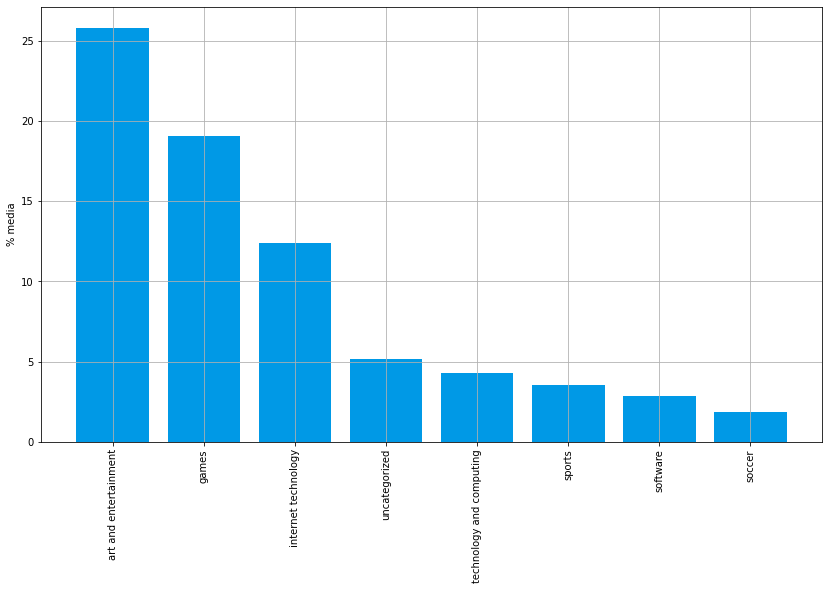

In [ ]:
plt.bar(medie_c2_notevoli.sort_values('Media', ascending=False)['Colonna'], medie_c2_notevoli.sort_values('Media', ascending=False)['Media'], color=colore_scelto); # ordinati
#plt.bar(medie_c2_notevoli['Colonna'], medie_c2_notevoli['Media']); # non ordinati
plt.xticks(rotation='vertical');
plt.grid();
plt.ylabel('% media');

## Click e non click separati

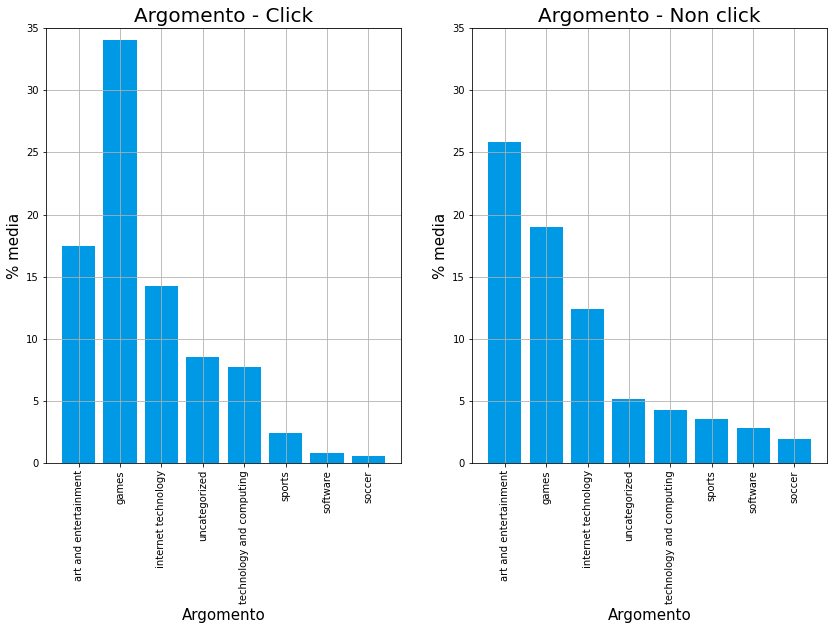

In [ ]:
# Click
plt.subplot(121);
plt.bar(medie_c2_notevoli.sort_values('Media non click', ascending=False)['Colonna'], medie_c2_notevoli.sort_values('Media non click', ascending=False)['Media click'], color=colore_scelto);
plt.xticks(rotation='vertical');
plt.grid();
plt.ylabel('% media', fontsize=font_label);
plt.xlabel('Argomento', fontsize=font_label);
plt.title('Argomento - Click', fontsize=font_title);
plt.ylim(0,35);

# Non click
plt.subplot(122);
plt.bar(medie_c2_notevoli.sort_values('Media non click', ascending=False)['Colonna'], medie_c2_notevoli.sort_values('Media non click', ascending=False)['Media non click'], color=colore_scelto);
plt.xticks(rotation='vertical');
plt.grid();
plt.ylabel('% media', fontsize=font_label);
plt.xlabel('Argomento', fontsize=font_label);
plt.title('Argomento - Non click', fontsize=font_title);
plt.ylim(0,35);

# Feelings
Li lascio, non fanno comunque male.

In [ ]:
# Colonne feelings
fel = re.compile('feelings\d+.*', re.IGNORECASE)
feel = []
for label in df.columns:
  occ = fel.findall(label)
  if occ:
    feel.append(occ[0])

## Click e non click uniti

In [ ]:
# Medie feelings
medie_f = pd.DataFrame()
for colonna in feel:
  if df[colonna].dtypes == "float64":
    diz = {}
    diz['Colonna'] = colonna
    diz['Media'] = df[colonna].mean()
    diz['Media click'] = df[df['click_status'] == 'yes'][colonna].mean()
    diz['Media non click'] = df[df['click_status'] == 'no'][colonna].mean()

    medie_f = medie_f.append(diz, ignore_index=True)

In [ ]:
medie_f

,Colonna,Media,Media click,Media non click
0,feelings1_amusement,12.626908,23.387196,12.594207
1,feelings1_emotions,11.653247,19.198942,11.630315
2,feelings1_pain,0.058672,0.252857,0.058082
3,feelings1_others,4.146245,2.668942,4.150734


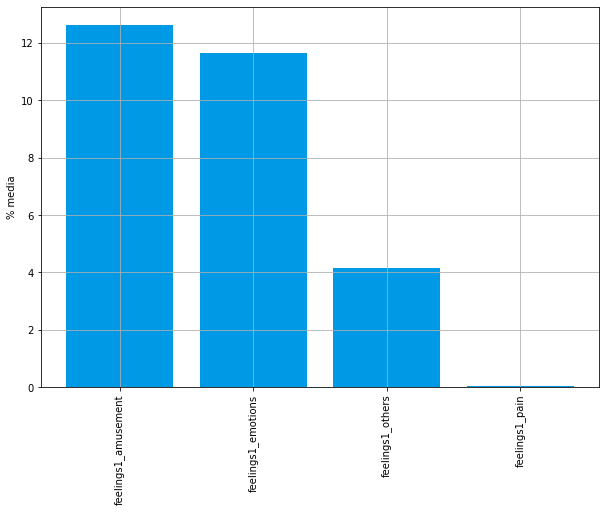

In [ ]:
plt.bar(medie_f.sort_values('Media', ascending=False)['Colonna'], medie_f.sort_values('Media', ascending=False)['Media'], color=colore_scelto); # ordinati
#plt.bar(medie_f['Colonna'], medie_f['Media']) # non ordinati
plt.xticks(rotation='vertical');
plt.grid();
plt.ylabel('% media');

## Analisi degli 0
Le medie sono ovviamente influenzate dai tanti 0. Riconto qui quanti sono.

In [ ]:
len(df[(df['feelings1_amusement'] == 0) & 
       (df['feelings1_emotions'] == 0) & 
       (df['feelings1_pain'] == 0) & 
       (df['feelings1_others'] == 0)])

44610

Guardo quanti sì ci sono tra questi e quanti sono in totale.

In [ ]:
x = len(df[(df['feelings1_amusement'] == 0) & 
           (df['feelings1_emotions'] == 0) & 
           (df['feelings1_pain'] == 0) & 
           (df['feelings1_others'] == 0) &
           (df['click_status'] == 'yes')])

print(f"Numero di click che hanno tutte le entrate di feelings pari a 0: {x}/{len(df[df['click_status'] == 'yes'])}")

Numero di click che hanno tutte le entrate di feelings pari a 0: 103/189


## Click e non click separati

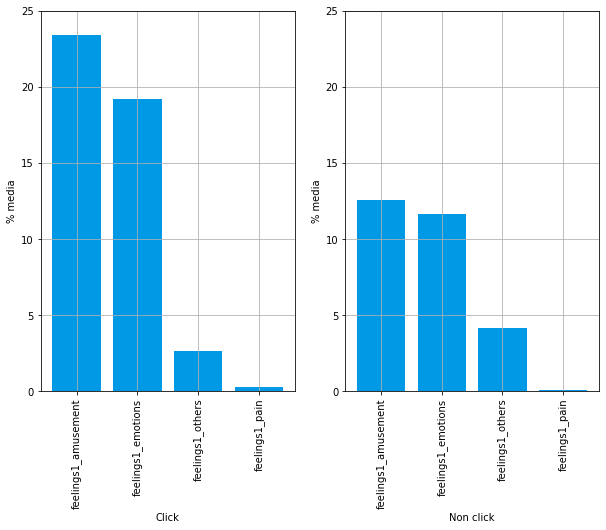

In [ ]:
# Click
plt.subplot(121);
plt.bar(medie_f.sort_values('Media non click', ascending=False)['Colonna'], medie_f.sort_values('Media non click', ascending=False)['Media click'], color=colore_scelto);
plt.xticks(rotation='vertical');
plt.grid();
plt.ylabel('% media');
plt.xlabel('Click');
plt.ylim(0,25);

# Non click
plt.subplot(122);
plt.bar(medie_f.sort_values('Media non click', ascending=False)['Colonna'], medie_f.sort_values('Media non click', ascending=False)['Media non click'], color=colore_scelto);
plt.xticks(rotation='vertical');
plt.grid();
plt.ylabel('% media');
plt.xlabel('Non click');
plt.ylim(0,25);

# Variabili categoriche

## Click e non click separati
Analisi sul comportamento dei due diversi gruppi.

### Esempio
Codice che poi generalizzo

In [ ]:
df.groupby(['os_android','click_status'])['click_status'].count()

os_android  click_status
False       no              59999
            yes               179
True        no               2191
            yes                10
Name: click_status, dtype: int64

* False no == non usano Android e non cliccano
* False yes == non usano Android ma cliccano
* True no == usano Android ma non cliccano
* True yes == usano Android e cliccano

A me interessa chi usa Android in generale

In [ ]:
list(df.groupby(['os_android','click_status'])['click_status'].count())

[59999, 179, 2191, 10]

Voglio qunidi le ultime due entrate di questo vettore.

### Conteggi

In [ ]:
# Creo un dataframe con i conteggi di ogni colonna binaria
df_conteggi = pd.DataFrame()
for colonna in colonne:
  if df[colonna].dtypes == "bool" and colonna != 'click_status':
    diz = {}
    
    # Sistemo nome delle colonne
    str_colonna = colonna
    
    if 'os_' in str_colonna: # colonne os_
      str_colonna = str_colonna.replace('os_', '')
    else: # colonne browser_
      str_colonna = str_colonna.replace('browser_', '')
    
    str_colonna = str_colonna.replace(str_colonna[0], str_colonna[0].upper())

    # Costruisco il dizionario
    diz['Colonna'] = str_colonna
    
    # Calcolo il conteggio
    try: # Se ci sono utenti che utilizzano colonna
      diz['Numero di click'] = list(df.groupby([colonna, 'click_status'])['click_status'].count())[3] # quanti click usano colonna
    except: # Se non ci sono utenti che utilizzano colonna
      diz['Numero di click'] = 0
    
    try: # Se ci sono utenti che utilizzano colonna
      diz['Numero di non click'] = list(df.groupby([colonna, 'click_status'])['click_status'].count())[2] # quanti non click usano colonna
    
    except: # Se ci sono utenti che utilizzano colonna
      diz['Numero di non click'] = 0

    df_conteggi = df_conteggi.append(diz, ignore_index=True)

In [ ]:
# Sistemo device_type
print(df.groupby(['device_type', 'click_status']).size())
print('\n')
print(list(df.groupby(['device_type', 'click_status']).size()))

device_type  click_status
1            no               2192
             yes                10
2            no              59996
             yes               179
3            no                  2
dtype: int64


[2192, 10, 59996, 179, 2]


In [ ]:
# Costruisco dizionario a mano e converto a dataframe
df_device = []

# device_type = 1 -> sarebbe carino avere i nomi corretti
df_device.append(
    {
        'Colonna':'Mobile',
        'Numero di click':list(df.groupby(['device_type', 'click_status']).size())[1],
        'Numero di non click':list(df.groupby(['device_type', 'click_status']).size())[0]
    }
)

# device_type = 2
df_device.append(
    {
        'Colonna':'Desktop and laptop',
        'Numero di click':list(df.groupby(['device_type', 'click_status']).size())[3],
        'Numero di non click':list(df.groupby(['device_type', 'click_status']).size())[2]
    }
)

# device_type = 3
df_device.append(
    {
        'Colonna':'Unknown',
        'Numero di click':0,
        'Numero di non click':list(df.groupby(['device_type', 'click_status']).size())[4]
    }
)

df_device = pd.DataFrame(df_device)

In [ ]:
# Unisco i due dataframe
df_conteggi = df_conteggi.append(df_device, ignore_index=True)

# Modifico il tipo delle colonne numeriche
df_conteggi = df_conteggi.astype({
    'Numero di click':'int32',
    'Numero di non click':'int32',
})

# Correggo WindoWs ed EdgE
df_conteggi.loc[6, 'Colonna'] = 'Windows'
df_conteggi.loc[10, 'Colonna'] = 'Edge'

In [ ]:
df_conteggi

,Colonna,Numero di click,Numero di non click
0,Android,10,2191
1,Bsd,0,1
2,Ios,0,0
3,Linux,2,461
4,Osx,24,9506
5,Other,0,4
6,Windows,153,50027
7,Android,1,47
8,Chrome,109,40440
9,Chromium,0,0


### Os

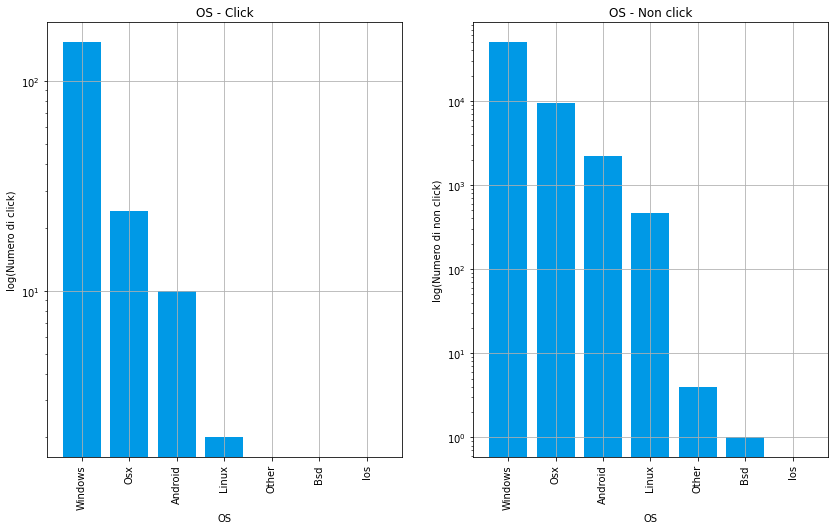

In [ ]:
# Click
plt.subplot(121);
plt.bar(df_conteggi[0:7].sort_values('Numero di non click', ascending=False)['Colonna'], df_conteggi[0:7].sort_values('Numero di non click', ascending=False)['Numero di click'], color=colore_scelto);
plt.xticks(rotation='vertical');
plt.grid();
plt.ylabel('log(Numero di click)');
plt.title('OS - Click');
plt.xlabel('OS');
plt.yscale('log');

# Non click
plt.subplot(122);
plt.bar(df_conteggi[0:7].sort_values('Numero di non click', ascending=False)['Colonna'], df_conteggi[0:7].sort_values('Numero di non click', ascending=False)['Numero di non click'], color=colore_scelto);
plt.xticks(rotation='vertical');
plt.grid();
plt.ylabel('log(Numero di non click)');
plt.title('OS - Non click');
plt.xlabel('OS');
plt.yscale('log');

### Browser

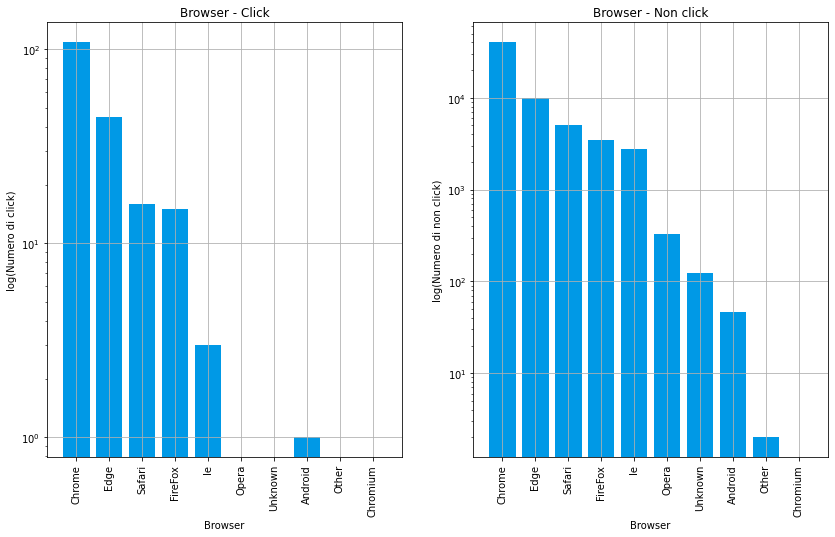

In [ ]:
# Click
plt.subplot(121);
plt.bar(df_conteggi[7:17].sort_values('Numero di non click', ascending=False)['Colonna'], df_conteggi[7:17].sort_values('Numero di non click', ascending=False)['Numero di click'], color=colore_scelto);
plt.xticks(rotation='vertical');
plt.grid();
plt.ylabel('log(Numero di click)');
plt.title('Browser - Click');
plt.xlabel('Browser');
plt.yscale('log');

# Non click
plt.subplot(122);
plt.bar(df_conteggi[7:17].sort_values('Numero di non click', ascending=False)['Colonna'], df_conteggi[7:17].sort_values('Numero di non click', ascending=False)['Numero di non click'], color=colore_scelto);
plt.xticks(rotation='vertical');
plt.grid();
plt.ylabel('log(Numero di non click)');
plt.title('Browser - Non click');
plt.xlabel('Browser');
plt.yscale('log');

### Device type

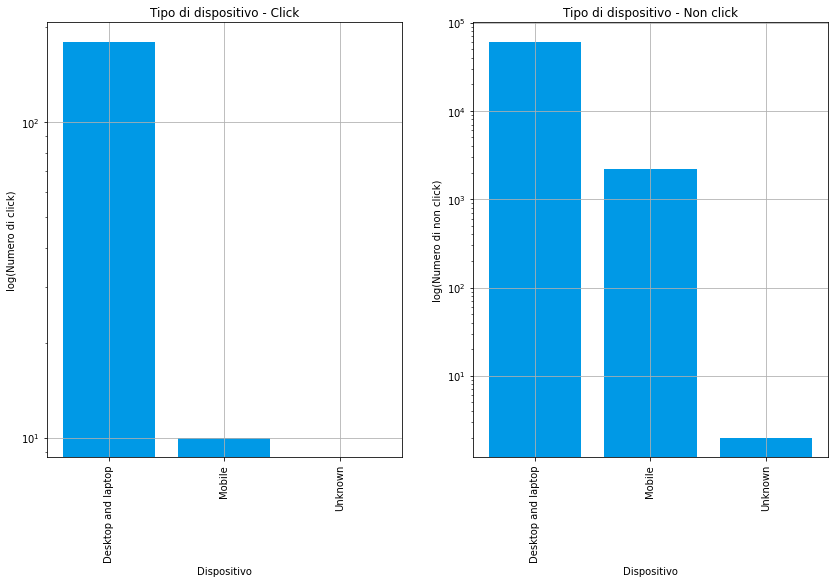

In [ ]:
# Click
plt.subplot(121);
plt.bar(df_conteggi[17:].sort_values('Numero di non click', ascending=False)['Colonna'], df_conteggi[17:].sort_values('Numero di non click', ascending=False)['Numero di click'], color=colore_scelto);
plt.xticks(rotation='vertical');
plt.grid();
plt.ylabel('log(Numero di click)');
plt.title('Tipo di dispositivo - Click');
plt.xlabel('Dispositivo');
plt.yscale('log');

# Non click
plt.subplot(122);
plt.bar(df_conteggi[17:].sort_values('Numero di non click', ascending=False)['Colonna'], df_conteggi[17:].sort_values('Numero di non click', ascending=False)['Numero di non click'], color=colore_scelto);
plt.xticks(rotation='vertical');
plt.grid();
plt.ylabel('log(Numero di non click)');
plt.title('Tipo di dispositivo - Non click');
plt.xlabel('Dispositivo');
plt.yscale('log');

## Click e non click separati e normalizzati

### Conteggi

In [ ]:
df_conteggi

,Colonna,Numero di click,Numero di non click
0,Android,10,2191
1,Bsd,0,1
2,Ios,0,0
3,Linux,2,461
4,Osx,24,9506
5,Other,0,4
6,Windows,153,50027
7,Android,1,47
8,Chrome,109,40440
9,Chromium,0,0


In [ ]:
# Numero di click
n_no = list(df.groupby('click_status').size())[0]
n_yes = list(df.groupby('click_status').size())[1]
print(n_no, n_yes)

62190 189


In [ ]:
df_conteggi['Numero di click'] = df_conteggi['Numero di click'] / n_yes
df_conteggi['Numero di non click'] = df_conteggi['Numero di non click'] / n_no

df_conteggi

,Colonna,Numero di click,Numero di non click
0,Android,0.052910,0.035231
1,Bsd,0.000000,0.000016
2,Ios,0.000000,0.000000
3,Linux,0.010582,0.007413
4,Osx,0.126984,0.152854
5,Other,0.000000,0.000064
6,Windows,0.809524,0.804422
7,Android,0.005291,0.000756
8,Chrome,0.576720,0.650265
9,Chromium,0.000000,0.000000


### Os

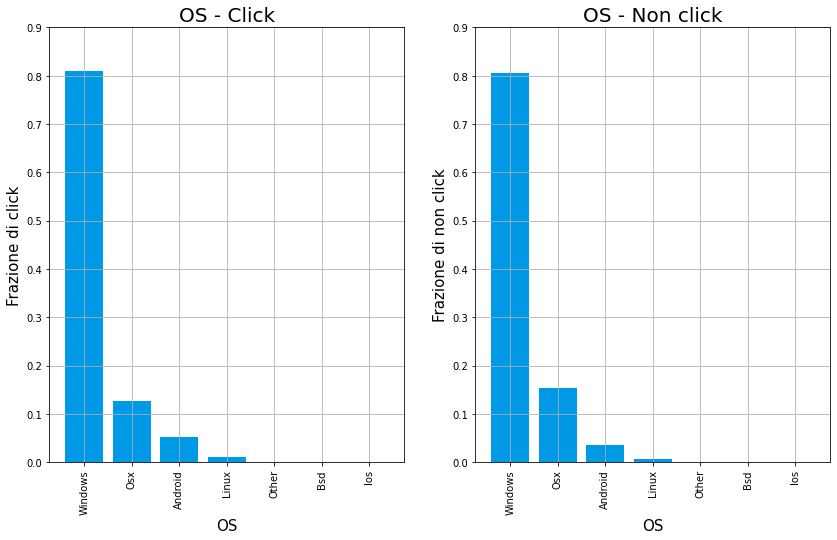

In [ ]:
# Click
plt.subplot(121);
plt.bar(df_conteggi[0:7].sort_values('Numero di non click', ascending=False)['Colonna'], df_conteggi[0:7].sort_values('Numero di non click', ascending=False)['Numero di click'], color=colore_scelto);
plt.xticks(rotation='vertical');
plt.grid();
plt.ylabel('Frazione di click', fontsize=font_label);
plt.xlabel('OS', fontsize=font_label);
plt.title('OS - Click', fontsize=font_title);
plt.ylim(0,0.9);

# Non click
plt.subplot(122);
plt.bar(df_conteggi[0:7].sort_values('Numero di non click', ascending=False)['Colonna'], df_conteggi[0:7].sort_values('Numero di non click', ascending=False)['Numero di non click'], color=colore_scelto);
plt.xticks(rotation='vertical');
plt.grid();
plt.ylabel('Frazione di non click', fontsize=font_label);
plt.xlabel('OS', fontsize=font_label);
plt.title('OS - Non click', fontsize=font_title);
plt.ylim(0,0.9);

### Browser

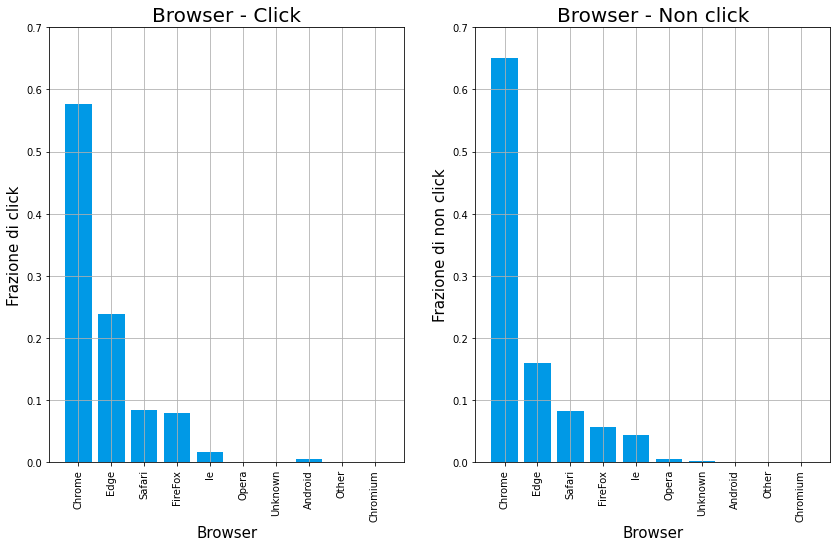

In [ ]:
# Click
plt.subplot(121);
plt.bar(df_conteggi[7:17].sort_values('Numero di non click', ascending=False)['Colonna'], df_conteggi[7:17].sort_values('Numero di non click', ascending=False)['Numero di click'], color=colore_scelto);
plt.xticks(rotation='vertical');
plt.grid();
plt.ylabel('Frazione di click', fontsize=font_label);
plt.xlabel('Browser', fontsize=font_label);
plt.title('Browser - Click', fontsize=font_title);
plt.ylim(0,0.7);

# Non click
plt.subplot(122);
plt.bar(df_conteggi[7:17].sort_values('Numero di non click', ascending=False)['Colonna'], df_conteggi[7:17].sort_values('Numero di non click', ascending=False)['Numero di non click'], color=colore_scelto);
plt.xticks(rotation='vertical');
plt.grid();
plt.ylabel('Frazione di non click', fontsize=font_label);
plt.xlabel('Browser', fontsize=font_label);
plt.title('Browser - Non click', fontsize=font_title);
plt.ylim(0,0.7);

### Device type

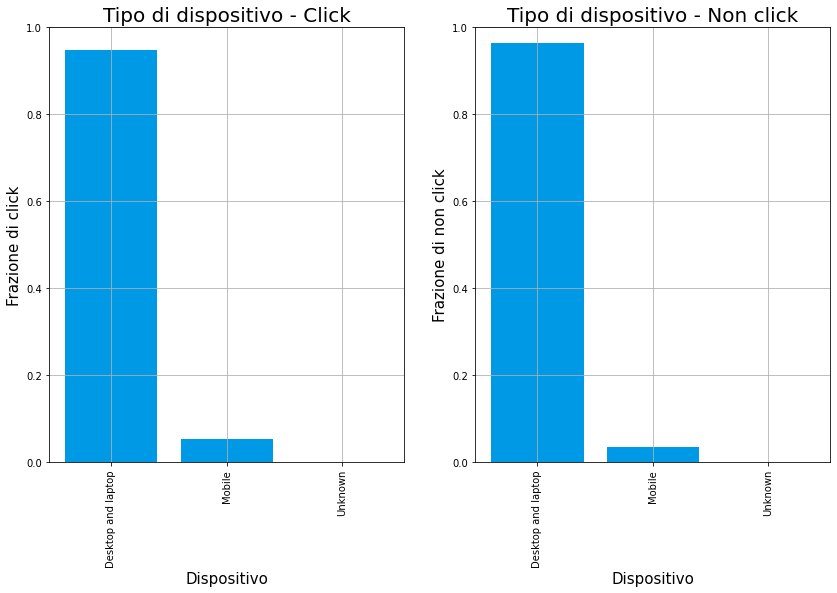

In [ ]:
# Click
plt.subplot(121);
plt.bar(df_conteggi[17:].sort_values('Numero di non click', ascending=False)['Colonna'], df_conteggi[17:].sort_values('Numero di non click', ascending=False)['Numero di click'], color=colore_scelto);
plt.xticks(rotation='vertical');
plt.grid();
plt.ylabel('Frazione di click', fontsize=font_label);
plt.xlabel('Dispositivo', fontsize=font_label);
plt.title('Tipo di dispositivo - Click', fontsize=font_title);
plt.ylim(0,1);

# Non click
plt.subplot(122);
plt.bar(df_conteggi[17:].sort_values('Numero di non click', ascending=False)['Colonna'], df_conteggi[17:].sort_values('Numero di non click', ascending=False)['Numero di non click'], color=colore_scelto);
plt.xticks(rotation='vertical');
plt.grid();
plt.ylabel('Frazione di non click', fontsize=font_label);
plt.xlabel('Dispositivo', fontsize=font_label);
plt.title('Tipo di dispositivo - Non click', fontsize=font_title);
plt.ylim(0,1);

## Click e non click uniti
Analisi su cosa usano gli utenti.

### Conteggi

In [ ]:
# Creo un dataframe con i conteggi di ogni colonna binaria
df_conteggi = pd.DataFrame()
for colonna in colonne:
  if df[colonna].dtypes == "bool" and colonna != 'click_status':
    diz = {}

    # Tolgo os_ e browser_ dal nome della colonna
    str_colonna = colonna

    if 'os_' in str_colonna:
      str_colonna = str_colonna.replace('os_', '')
    
    else:
      str_colonna = str_colonna.replace('browser_', '')
      
    # Metto l'iniziale maiuscola maiuscola
    str_colonna = str_colonna.replace(str_colonna[0], str_colonna[0].upper())

    diz['Colonna'] = str_colonna
    
    # Calcolo il conteggio
    diz['Utenti che usano'] = len(df[df[colonna] == True])
    diz['Utenti che non usano'] = len(df[df[colonna] == False])

    df_conteggi = df_conteggi.append(diz, ignore_index=True)

In [ ]:
# Sistemo device_type
print(df.groupby('device_type').size())

device_type
1     2202
2    60175
3        2
dtype: int64


In [ ]:
# Costruisco dizionario a mano e converto a dataframe
df_device = []

# device_type = 1 -> sarebbe carino avere i nomi corretti
df_device.append(
    {
        'Colonna':'Mobile',
        'Utenti che usano':len(df[df['device_type'] == 1]),
        'Utenti che non usano':len(df[df['device_type'] != 1])
    }
)

# device_type = 2
df_device.append(
    {
        'Colonna':'Desktop and laptop',
        'Utenti che usano':len(df[df['device_type'] == 2]),
        'Utenti che non usano':len(df[df['device_type'] != 2])
    }
)

# device_type = 3
df_device.append(
    {
        'Colonna':'Unknown',
        'Utenti che usano':len(df[df['device_type'] == 3]),
        'Utenti che non usano':len(df[df['device_type'] != 3])
    }
)

df_device = pd.DataFrame(df_device)

In [ ]:
# Unisco i due dataframe
df_conteggi = df_conteggi.append(df_device, ignore_index=True)

# Modifico il tipo delle colonne numeriche
df_conteggi = df_conteggi.astype({
    'Utenti che usano':'int32',
    'Utenti che non usano':'int32',
})

# Correggo WindoWs ed EdgE
df_conteggi.loc[6, 'Colonna'] = 'Windows'
df_conteggi.loc[10, 'Colonna'] = 'Edge'

In [ ]:
df_conteggi

,Colonna,Utenti che usano,Utenti che non usano
0,Android,2201,60178
1,Bsd,1,62378
2,Ios,0,62379
3,Linux,463,61916
4,Osx,9530,52849
5,Other,4,62375
6,Windows,50180,12199
7,Android,48,62331
8,Chrome,40549,21830
9,Chromium,0,62379


In [ ]:
# Faccio un controllo vedendo se le somme sono corrette
df_conteggi['somma'] = df_conteggi['Utenti che usano'] + df_conteggi['Utenti che non usano']
df_conteggi

,Colonna,Utenti che usano,Utenti che non usano,somma
0,Android,2201,60178,62379
1,Bsd,1,62378,62379
2,Ios,0,62379,62379
3,Linux,463,61916,62379
4,Osx,9530,52849,62379
5,Other,4,62375,62379
6,Windows,50180,12199,62379
7,Android,48,62331,62379
8,Chrome,40549,21830,62379
9,Chromium,0,62379,62379


### Os

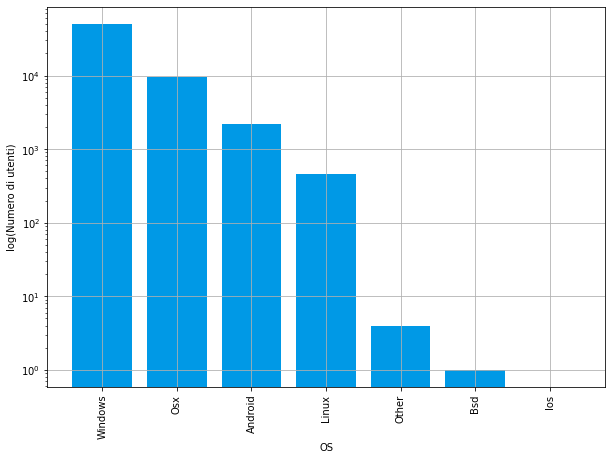

In [ ]:
# Aumento temporaneamente la dimensione dei grafici
#plt.rcParams['figure.figsize'] = [14, 8]

# Click
#plt.subplot(121);
plt.bar(df_conteggi[0:7].sort_values('Utenti che usano', ascending=False)['Colonna'], df_conteggi[0:7].sort_values('Utenti che usano', ascending=False)['Utenti che usano'], color=colore_scelto);
plt.xticks(rotation='vertical');
plt.grid();
plt.ylabel('log(Numero di utenti)');
plt.xlabel('OS');
plt.yscale('log');

# Non click
#plt.subplot(122);
#plt.bar(df_conteggi[0:7].sort_values('Utenti che usano', ascending=False)['Colonna'], df_conteggi[0:7].sort_values('Utenti che usano', ascending=False)['Utenti che non usano'], color=colore_scelto);
#plt.xticks(rotation='vertical');
#plt.grid();
#plt.ylabel('log(Numero di utenti)');
#plt.xlabel('OS');
#plt.yscale('log');

# Ritorno alla dimensione originale dei grafici
#plt.rcParams['figure.figsize'] = [10, 7]

### Browser

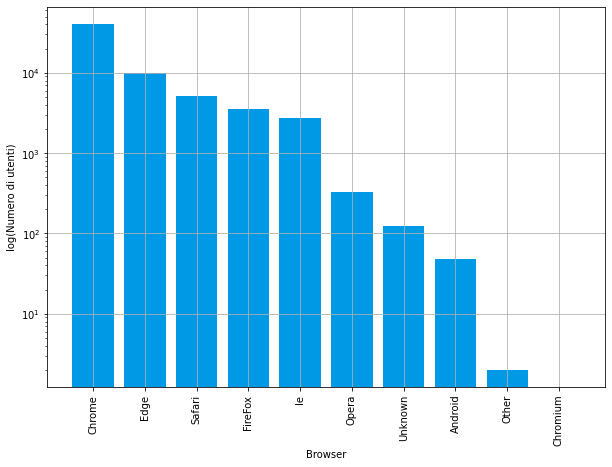

In [ ]:
# Aumento temporaneamente la dimensione dei grafici
#plt.rcParams['figure.figsize'] = [14, 8]

# Click
#plt.subplot(121);
plt.bar(df_conteggi[7:17].sort_values('Utenti che usano', ascending=False)['Colonna'], df_conteggi[7:17].sort_values('Utenti che usano', ascending=False)['Utenti che usano'], color=colore_scelto);
plt.xticks(rotation='vertical');
plt.grid();
plt.ylabel('log(Numero di utenti)');
plt.xlabel('Browser');
plt.yscale('log');

# Non click
#plt.subplot(122);
#plt.bar(df_conteggi[7:17].sort_values('Utenti che usano', ascending=False)['Colonna'], df_conteggi[7:17].sort_values('Utenti che non usano', ascending=False)['Utenti che usano'], color=colore_scelto);
#plt.xticks(rotation='vertical');
#plt.grid();
#plt.ylabel('log(Numero di utenti)');
#plt.xlabel('Browser');
#plt.yscale('log');

# Ritorno alla dimensione originale dei grafici
#plt.rcParams['figure.figsize'] = [10, 7]

### Device type

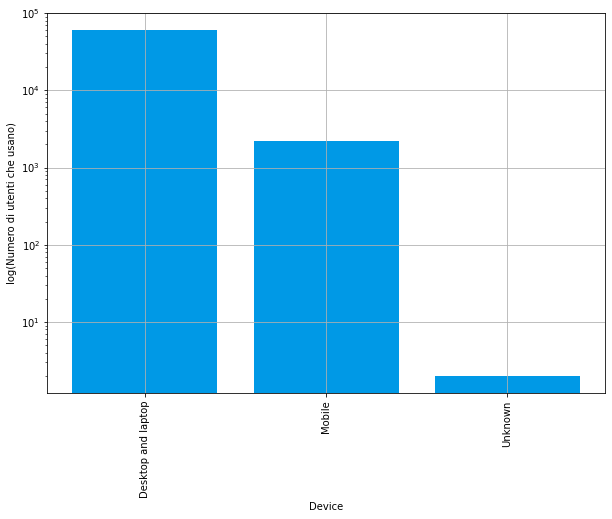

In [ ]:
# Click
#plt.subplot(121);
plt.bar(df_conteggi[17:].sort_values('Utenti che usano', ascending=False)['Colonna'], df_conteggi[17:].sort_values('Utenti che usano', ascending=False)['Utenti che usano'], color=colore_scelto);
plt.xticks(rotation='vertical');
plt.grid();
plt.ylabel('log(Numero di utenti che usano)');
plt.xlabel('Device');
plt.yscale('log');

# Non click
#plt.subplot(122);
#plt.bar(df_conteggi[17:].sort_values('Utenti che usano', ascending=False)['Colonna'], df_conteggi[17:].sort_values('Utenti che non usano', ascending=False)['Utenti che usano'], color=colore_scelto);
#plt.xticks(rotation='vertical');
#plt.grid();
#plt.ylabel('log(Numero di utenti che non usano)');
#plt.xlabel('Device');
#plt.yscale('log');